# Import

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from scipy import stats

import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams["font.size"] = 20

# Read Data

In [3]:
qm9 = pd.read_csv("notqm_ext_plus.csv")
qm9.index = qm9["Unnamed: 0"]
qm9.drop(columns=["Unnamed: 0"], inplace=True)
qm9["mol"] = qm9["smiles"].apply(Chem.MolFromSmiles)

In [4]:
qm9.dropna()

,smiles,mu,alpha,homo,lumo,gap,zpve,cv,u0,u298,h298,g298,num_atoms,mol
Unnamed: 0,,,,,,,,,,,,,,
0,C,0.0000,13.210000,-0.387700,0.117100,0.504800,0.044749,6.469,-40.478930,-40.476062,-40.475117,-40.498597,1,<rdkit.Chem.rdchem.Mol object at 0x7f8efd72a5c0>
1,N,1.6256,9.460000,-0.257000,0.082900,0.339900,0.034358,6.316,-56.525887,-56.523026,-56.522082,-56.544961,1,<rdkit.Chem.rdchem.Mol object at 0x7f8efd72a6e0>
2,O,1.8511,6.310000,-0.292800,0.068700,0.361500,0.021375,6.002,-76.404702,-76.401867,-76.400922,-76.422349,1,<rdkit.Chem.rdchem.Mol object at 0x7f8efd72a860>
3,C#C,0.0000,16.280000,-0.284500,0.050600,0.335100,0.026841,8.574,-77.308427,-77.305527,-77.304583,-77.327429,2,<rdkit.Chem.rdchem.Mol object at 0x7f8efd72a2c0>
4,C#N,2.8937,12.990000,-0.360400,0.019100,0.379600,0.016601,6.278,-93.411888,-93.409370,-93.408425,-93.431246,2,<rdkit.Chem.rdchem.Mol object at 0x7f8efd729f60>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155584,CCCCCC(Cl)(Cl)Cl,1.6998,91.438949,-0.437290,0.151861,0.589151,0.160407,39.627,-1612.899018,-1615.123029,-1612.726294,-1612.777780,9,<rdkit.Chem.rdchem.Mol object at 0x7f8efbcf2860>
155585,CCCNCC(Cl)(Cl)Cl,1.0758,88.241518,-0.375428,0.153217,0.528645,0.149152,39.102,-1628.886186,-1631.151460,-1628.724865,-1628.775694,9,<rdkit.Chem.rdchem.Mol object at 0x7f8efbcf28c0>
155586,CCCOCC(Cl)(Cl)Cl,5.6070,83.982178,-0.429966,0.153852,0.583818,0.136714,37.858,-1648.698216,-1651.009167,-1648.549519,-1648.600105,9,<rdkit.Chem.rdchem.Mol object at 0x7f8efbcf2920>


In [5]:
db_conf = pd.read_parquet("db_conf.parquet")
db_conf.index = db_conf["db_idx"]
db_conf.drop(columns=["Unnamed: 0", "db_idx"], inplace=True)
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
# db_conf.drop(columns=["CONF", "CONFCl", "CONFClBr", "CONFClBrI"], inplace=True)
db_conf = db_conf.reset_index(drop=True)

In [6]:
na_ind = db_conf[db_conf.iloc[:,4:-1].isna().all(axis=1)].index

In [7]:
db_conf = db_conf.drop(index=na_ind)
db_conf = db_conf.reset_index(drop=True)

# Labels Encoding

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
le.fit(["nB", "B"])
db_conf["class_encoded"] = le.transform(db_conf["Experimental BCF class"])

In [10]:
db_conf["class_encoded"] = db_conf["class_encoded"].replace({1:0, 0:1})

In [11]:
db_conf

,smiles,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9,mol,class_encoded
0,CNc1cccc(C)c1,0.849,nB,[6],None,None,None,[213],"[929, 939]","[4340, 5388]",[32107],<rdkit.Chem.rdchem.Mol object at 0x7f8ef9c507c0>,0
1,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,3.140,B,"[6, 7]","[12, 13, 14]","[21, 39, 40, 41]","[81, 84, 134, 136]","[213, 214, 277, 395, 548]","[948, 953, 1578]","[4590, 5397, 5402]","[31844, 33001, 33006]",<rdkit.Chem.rdchem.Mol object at 0x7f8ef9c50820>,1
2,CCCCCCCC/C=C\CCCCCCCCCCCCC,1.176,nB,[6],[12],[38],[132],[542],[2719],[14787],[123245],<rdkit.Chem.rdchem.Mol object at 0x7f8ef8c43700>,0
3,Clc1ccccc1Cl,2.500,nB,None,None,None,None,[213],[134076],[135441],None,<rdkit.Chem.rdchem.Mol object at 0x7f8ef8c435e0>,0
4,Nc1cccc([N+](=O)[O-])c1,0.522,nB,None,None,None,None,[213],[939],[4360],[131914],<rdkit.Chem.rdchem.Mol object at 0x7f8ef8c43580>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,CC1=C(C)S(=O)(=O)CCS1(=O)=O,0.633,nB,[6],None,None,None,"[133896, 133900]","[134043, 134044, 134066, 134068]","[135086, 135404, 135405]",[145115],<rdkit.Chem.rdchem.Mol object at 0x7f8ef8c2fc40>,0
835,FC(F)(F)c1ccc(Cl)c(Cl)c1,3.176,B,[6],None,None,None,[213],"[929, 134076]","[134378, 134382, 135441]",[137748],<rdkit.Chem.rdchem.Mol object at 0x7f8ef8c2fca0>,1
836,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,-0.222,nB,"[5, 6, 7]","[10, 12, 13]","[17, 20, 21, 34, 37, 38, 39, 41]","[54, 67, 68, 70, 71, 80, 81, 82, 83, 127, 131,...","[213, 224, 226, 228, 254, 258, 259, 260, 271, ...","[929, 948, 1092, 1094, 1099, 1104, 1119, 1129,...","[4341, 4957, 4959, 5378, 5407, 5809, 5841, 584...","[26263, 26273, 28867, 32083, 32170, 32193, 322...",<rdkit.Chem.rdchem.Mol object at 0x7f8ef8c2fd00>,0
837,CC(C)N(C(=O)CCl)c1ccccc1,1.568,nB,"[5, 6]","[10, 11, 12]","[18, 35]","[69, 73, 128]","[213, 255, 262, 288, 386]","[939, 1121, 1626, 1677]","[5388, 7443]","[25503, 26283, 32992]",<rdkit.Chem.rdchem.Mol object at 0x7f8ef8c2fd60>,0


In [12]:
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
db_conf["num_atoms"] = db_conf["mol"].apply(lambda x: x.GetNumAtoms())

# Calculate FQDs

In [13]:
db_conf_filled = db_conf.copy()

In [14]:
qprops = "mu,alpha,homo,lumo,gap,zpve,u0,u298,h298,g298,cv".split(",")

In [15]:
import statistics
def calculate_FQDs(indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        ret.append(patterns_db[quantum_property][i])
    return statistics.mean(ret)

def calculate_FQDs_quant(mol, indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        n_occurences = len(list(mol.GetSubstructMatch(patterns_db["mol"][i])))
        ret.append(patterns_db[quantum_property][i] * n_occurences)
    return statistics.mean(ret)

In [16]:
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}"] = db_conf_filled[f"FQD_{num}"].apply(calculate_FQDs, patterns_db=qm9, quantum_property=prop)

In [17]:
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

# Quant FQDs

In [18]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}"] = db_conf_filled["mol"].apply(lambda x: calculate_FQDs_quant(x,
                                                                          indices=db_conf_filled[db_conf_filled["mol"]==x][f"FQD_{num}"].iloc[0],
                                                                          patterns_db=qm9,
                                                                          quantum_property=prop)
                                                                         )

In [19]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"quant_FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

In [20]:
import itertools
fqd_cols_qual = []
for num, prop in itertools.product(range(2,10), qprops):
    fqd_cols_qual.append(f"FQD_{num}_{prop}")
fqd_cols_qual_per_atom = [f"{x}_per_atom" for x in fqd_cols_qual]
quant_fqd_cols = [f"quant_{x}" for x in fqd_cols_qual]
quant_fqd_cols_per_atom = [f"quant_{x}" for x in fqd_cols_qual_per_atom]

In [21]:
db_conf_filled.columns[14:]

Index(['quant_FQD_2_mu', 'quant_FQD_3_mu', 'quant_FQD_4_mu', 'quant_FQD_5_mu',
       'quant_FQD_6_mu', 'quant_FQD_7_mu', 'quant_FQD_8_mu', 'quant_FQD_9_mu',
       'quant_FQD_2_alpha', 'quant_FQD_3_alpha',
       ...
       'quant_FQD_8_g298_per_atom', 'quant_FQD_9_g298_per_atom',
       'quant_FQD_2_cv_per_atom', 'quant_FQD_3_cv_per_atom',
       'quant_FQD_4_cv_per_atom', 'quant_FQD_5_cv_per_atom',
       'quant_FQD_6_cv_per_atom', 'quant_FQD_7_cv_per_atom',
       'quant_FQD_8_cv_per_atom', 'quant_FQD_9_cv_per_atom'],
      dtype='object', length=176)

In [22]:
cols = db_conf_filled.columns[14:]

# Fill with zeros

In [23]:
nan_cols = db_conf.iloc[:,3:11].isna()

In [24]:
x = db_conf_filled[cols].fillna(0)
y = db_conf_filled["class_encoded"]

In [25]:
nan_cols_colnames = [f"{x}_nan" for x in nan_cols]
nan_cols.columns = nan_cols_colnames
nan_cols

,FQD_2_nan,FQD_3_nan,FQD_4_nan,FQD_5_nan,FQD_6_nan,FQD_7_nan,FQD_8_nan,FQD_9_nan
0,False,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,True
4,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...
834,False,True,True,True,False,False,False,False
835,False,True,True,True,False,False,False,False
836,False,False,False,False,False,False,False,False
837,False,False,False,False,False,False,False,False


In [26]:
x = pd.concat([x, nan_cols], axis=1)
x

,quant_FQD_2_mu,quant_FQD_3_mu,quant_FQD_4_mu,quant_FQD_5_mu,quant_FQD_6_mu,quant_FQD_7_mu,quant_FQD_8_mu,quant_FQD_9_mu,quant_FQD_2_alpha,quant_FQD_3_alpha,...,quant_FQD_8_cv_per_atom,quant_FQD_9_cv_per_atom,FQD_2_nan,FQD_3_nan,FQD_4_nan,FQD_5_nan,FQD_6_nan,FQD_7_nan,FQD_8_nan,FQD_9_nan
0,0.000000,0.0000,0.00000,0.000000,0.000000,6.848800,13.020800,14.40630,47.900000,0.00,...,25.429333,34.071000,False,True,True,True,False,False,False,False
1,1.525800,2.6230,3.80990,8.173250,7.871760,5.880933,4.931733,12.29910,40.920000,90.75,...,8.696556,11.601875,False,False,False,False,False,False,False,False
2,0.000000,0.1791,0.00000,0.301500,0.000000,0.422100,0.000000,0.54180,47.900000,104.25,...,13.616348,17.217000,False,False,False,False,False,False,False,False
3,0.000000,0.0000,0.00000,0.000000,0.000000,-0.000700,-21.363200,0.00000,0.000000,0.00,...,24.767000,0.000000,True,True,True,True,False,False,False,True
4,0.000000,0.0000,0.00000,0.000000,0.000000,11.422600,9.324000,39.49380,0.000000,0.00,...,23.248000,23.053500,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0.000000,0.0000,0.00000,0.000000,-3.479100,-10.527475,-11.717333,16.39350,47.900000,0.00,...,23.407333,30.375750,False,True,True,True,False,False,False,False
835,0.000000,0.0000,0.00000,0.000000,0.000000,1.137150,-18.736800,-27.43740,47.900000,0.00,...,16.680667,21.668250,False,True,True,True,False,False,False,False
836,2.423133,4.0410,5.00385,9.239357,9.384406,12.560830,15.701759,18.30079,36.733333,87.73,...,8.633506,10.959239,False,False,False,False,False,False,False,False
837,2.108900,6.3565,14.68760,18.250833,17.415000,21.800975,20.810000,21.11280,38.130000,81.43,...,18.348571,20.109643,False,False,False,False,False,False,False,False


In [27]:
dat3, dat3_y = x.copy(), y.copy()

# OOB dataset creation

In [28]:
oob_idx = np.loadtxt("oob_idx").astype(int)
train_idx = np.loadtxt("train_idx").astype(int)

In [29]:
res_x, res_y = x.loc[list(train_idx.astype(int))], y.loc[list(train_idx.astype(int))]

In [30]:
oob_x, oob_y = x.loc[list(oob_idx)], y.loc[list(oob_idx)]

In [31]:
x, y = res_x, res_y

In [32]:
y.value_counts()

0    409
1    117
Name: class_encoded, dtype: int64

# Modelling

# Pipeline creation

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import xgboost as xgb
import lightgbm as lgb

In [39]:
scor_dict = {"algorithm": [],
            "balanced_accuracy": [],
            "f1 score": []}

In [37]:
pca = PCA(n_components=0.95)

In [40]:
from sklearn.model_selection import StratifiedKFold

def my_score(model, n_folds, scoring_callable, X, Y):
    scores = [],[]
    cv = StratifiedKFold(n_folds)
    oversampler = RandomOverSampler(random_state=1)
    preprocessor = ColumnTransformer(
        [("prep", Pipeline([
            ("scaler", StandardScaler()),
            ("pca_cont_data", pca)
        ]),
                                     cols)], remainder="passthrough")

    for train_index, validation_index in cv.split(X, Y):
        x, y = X.iloc[train_index], Y.iloc[train_index]
        xx, yy = oversampler.fit_resample(x, y)
        xx = preprocessor.fit_transform(xx)
        model.fit(xx, yy)
        x_val = X.iloc[validation_index]
        x_val = preprocessor.transform(x_val)
        score_bac = scoring_callable[0](Y.iloc[validation_index], model.predict(x_val))
        score_f = scoring_callable[1](Y.iloc[validation_index], model.predict(x_val))
        
        print(f"bac: {score_bac}, f1: {score_f}")
        scores[0].append(score_bac)
        scores[1].append(score_f)
    
    return scores

### Baseline

In [40]:
scor_dict["algorithm"].extend(["Baseline"]*5)

In [41]:
dum = DummyClassifier(strategy="uniform", random_state=1)

In [42]:
scores = my_score(dum, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.41565040650406504, f1: 0.2439024390243903
bac: 0.46604938271604934, f1: 0.2926829268292683
bac: 0.5082184517497349, f1: 0.32098765432098764
bac: 0.4247083775185578, f1: 0.24691358024691357
bac: 0.591728525980912, f1: 0.3950617283950617


In [43]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [44]:
scor_dict["f1 score"].extend(list(scores[1]))

### LogClf

In [45]:
scor_dict["algorithm"].extend(["Logistic Regression"]*5)

In [46]:
reg = LogisticRegression(max_iter=100000)

In [47]:
scores = my_score(reg, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7433943089430894, f1: 0.5588235294117647
bac: 0.8510802469135803, f1: 0.711864406779661
bac: 0.7232237539766702, f1: 0.53125
bac: 0.7319724284199364, f1: 0.5517241379310345
bac: 0.7372746553552492, f1: 0.5833333333333334


In [48]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [49]:
scor_dict["f1 score"].extend(list(scores[1]))

### Rand Forest

In [50]:
scor_dict["algorithm"].extend(["Random Forest"]*5)

In [51]:
clf = RandomForestClassifier(
            n_estimators=1000,
            max_features=0.3,
            random_state=1
)

In [52]:
scores = my_score(clf, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7540650406504065, f1: 0.6037735849056604
bac: 0.8294753086419753, f1: 0.7555555555555556
bac: 0.7494697773064687, f1: 0.6086956521739131
bac: 0.7059915164369035, f1: 0.5454545454545454
bac: 0.5999469777306469, f1: 0.3529411764705882


In [53]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [54]:
scor_dict["f1 score"].extend(list(scores[1]))

### Grad Boosting

In [55]:
scor_dict["algorithm"].extend(["Gradient Boosting"]*5)

In [56]:
gbc = GradientBoostingClassifier(
            n_estimators=1000,
            max_features=0.3,
            random_state = 1,
)

In [57]:
scores = my_score(gbc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7271341463414633, f1: 0.5660377358490567
bac: 0.8171296296296297, f1: 0.723404255319149
bac: 0.7712089077412514, f1: 0.6382978723404256
bac: 0.6876988335100742, f1: 0.5106382978723404
bac: 0.6468716861081655, f1: 0.45


In [58]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [59]:
scor_dict["f1 score"].extend(list(scores[1]))

### KNN

In [60]:
scor_dict["algorithm"].extend(["KNN"]*5)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knc = KNeighborsClassifier()

In [63]:
scores = my_score(knc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7215447154471545, f1: 0.5263157894736842
bac: 0.7662037037037037, f1: 0.5937499999999999
bac: 0.6988335100742311, f1: 0.5
bac: 0.6770943796394486, f1: 0.4776119402985074
bac: 0.6519088016967126, f1: 0.45161290322580644


In [64]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [65]:
scor_dict["f1 score"].extend(list(scores[1]))

### SVC

In [66]:
scor_dict["algorithm"].extend(["SVC"]*5)

In [67]:
from sklearn.svm import SVC

In [68]:
svc = SVC(kernel="poly", degree=4)

In [69]:
scores = my_score(svc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.6768292682926829, f1: 0.5
bac: 0.7569444444444444, f1: 0.625
bac: 0.7494697773064687, f1: 0.6086956521739131
bac: 0.634676564156946, f1: 0.42857142857142855
bac: 0.634676564156946, f1: 0.42857142857142855


In [70]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [71]:
scor_dict["f1 score"].extend(list(scores[1]))

### XGBoost

In [72]:
scor_dict["algorithm"].extend(["XGBoost"]*5)

In [73]:
xgbc = xgb.XGBClassifier(n_estimators=1000, random_state=1)

In [74]:
scores = my_score(xgbc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7540650406504065, f1: 0.6037735849056604
bac: 0.7962962962962963, f1: 0.6956521739130435
bac: 0.7433722163308589, f1: 0.5957446808510638
bac: 0.6781548250265111, f1: 0.5
bac: 0.6529692470837752, f1: 0.46153846153846156


In [75]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [76]:
scor_dict["f1 score"].extend(list(scores[1]))

### Light GBM

In [77]:
scor_dict["algorithm"].extend(["Light GBM"]*5)

In [78]:
lgbc = lgb.LGBMClassifier(n_estimators=1000, random_state=1)

In [79]:
scores = my_score(lgbc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7393292682926829, f1: 0.5882352941176471
bac: 0.7816358024691358, f1: 0.6818181818181818
bac: 0.7616648992576882, f1: 0.6363636363636365
bac: 0.6903499469777307, f1: 0.5238095238095238
bac: 0.6216861081654295, f1: 0.4


In [80]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [81]:
scor_dict["f1 score"].extend(list(scores[1]))

### Scores vis

In [82]:
scors = pd.DataFrame(scor_dict)
scors

,algorithm,balanced_accuracy,f1 score
0,Baseline,0.415650,0.243902
1,Baseline,0.466049,0.292683
2,Baseline,0.508218,0.320988
3,Baseline,0.424708,0.246914
4,Baseline,0.591729,0.395062
5,Logistic Regression,0.743394,0.558824
6,Logistic Regression,0.851080,0.711864
7,Logistic Regression,0.723224,0.531250
8,Logistic Regression,0.731972,0.551724
9,Logistic Regression,0.737275,0.583333


In [83]:
scors.to_csv("scors_zeros_imp_pca.csv")

In [84]:
scors.groupby(["algorithm"]).mean().to_csv("groupby_zeros_marked2_pca.csv")

In [85]:
scors.groupby(["algorithm"]).mean()

,balanced_accuracy,f1 score
algorithm,,
Baseline,0.481271,0.299910
Gradient Boosting,0.730009,0.577676
KNN,0.703117,0.509858
Light GBM,0.718933,0.566045
Logistic Regression,0.757389,0.587399
Random Forest,0.727790,0.573284
SVC,0.690519,0.518168
XGBoost,0.724972,0.571342


In [86]:
scors.groupby(["algorithm"]).median()

,balanced_accuracy,f1 score
algorithm,,
Baseline,0.466049,0.292683
Gradient Boosting,0.727134,0.566038
KNN,0.698834,0.500000
Light GBM,0.739329,0.588235
Logistic Regression,0.737275,0.558824
Random Forest,0.749470,0.603774
SVC,0.676829,0.500000
XGBoost,0.743372,0.595745


In [87]:
melted = scors.melt(id_vars="algorithm", var_name="metric")
melted

,algorithm,metric,value
0,Baseline,balanced_accuracy,0.415650
1,Baseline,balanced_accuracy,0.466049
2,Baseline,balanced_accuracy,0.508218
3,Baseline,balanced_accuracy,0.424708
4,Baseline,balanced_accuracy,0.591729
...,...,...,...
75,Light GBM,f1 score,0.588235
76,Light GBM,f1 score,0.681818
77,Light GBM,f1 score,0.636364
78,Light GBM,f1 score,0.523810


In [88]:
melted.groupby(by=["algorithm","metric"]).apply(lambda x: np.percentile(x, [75, 50, 25]).sum()/3)

algorithm            metric           
Baseline             balanced_accuracy    0.466325
                     f1 score             0.286861
Gradient Boosting    balanced_accuracy    0.728681
                     f1 score             0.571658
KNN                  balanced_accuracy    0.699158
                     f1 score             0.501309
Light GBM            balanced_accuracy    0.730448
                     f1 score             0.582803
Logistic Regression  balanced_accuracy    0.737547
                     f1 score             0.564627
Random Forest        balanced_accuracy    0.736509
                     f1 score             0.585975
SVC                  balanced_accuracy    0.686992
                     f1 score             0.512422
XGBoost              balanced_accuracy    0.725197
                     f1 score             0.566506
dtype: float64

<AxesSubplot:xlabel='algorithm', ylabel='value'>

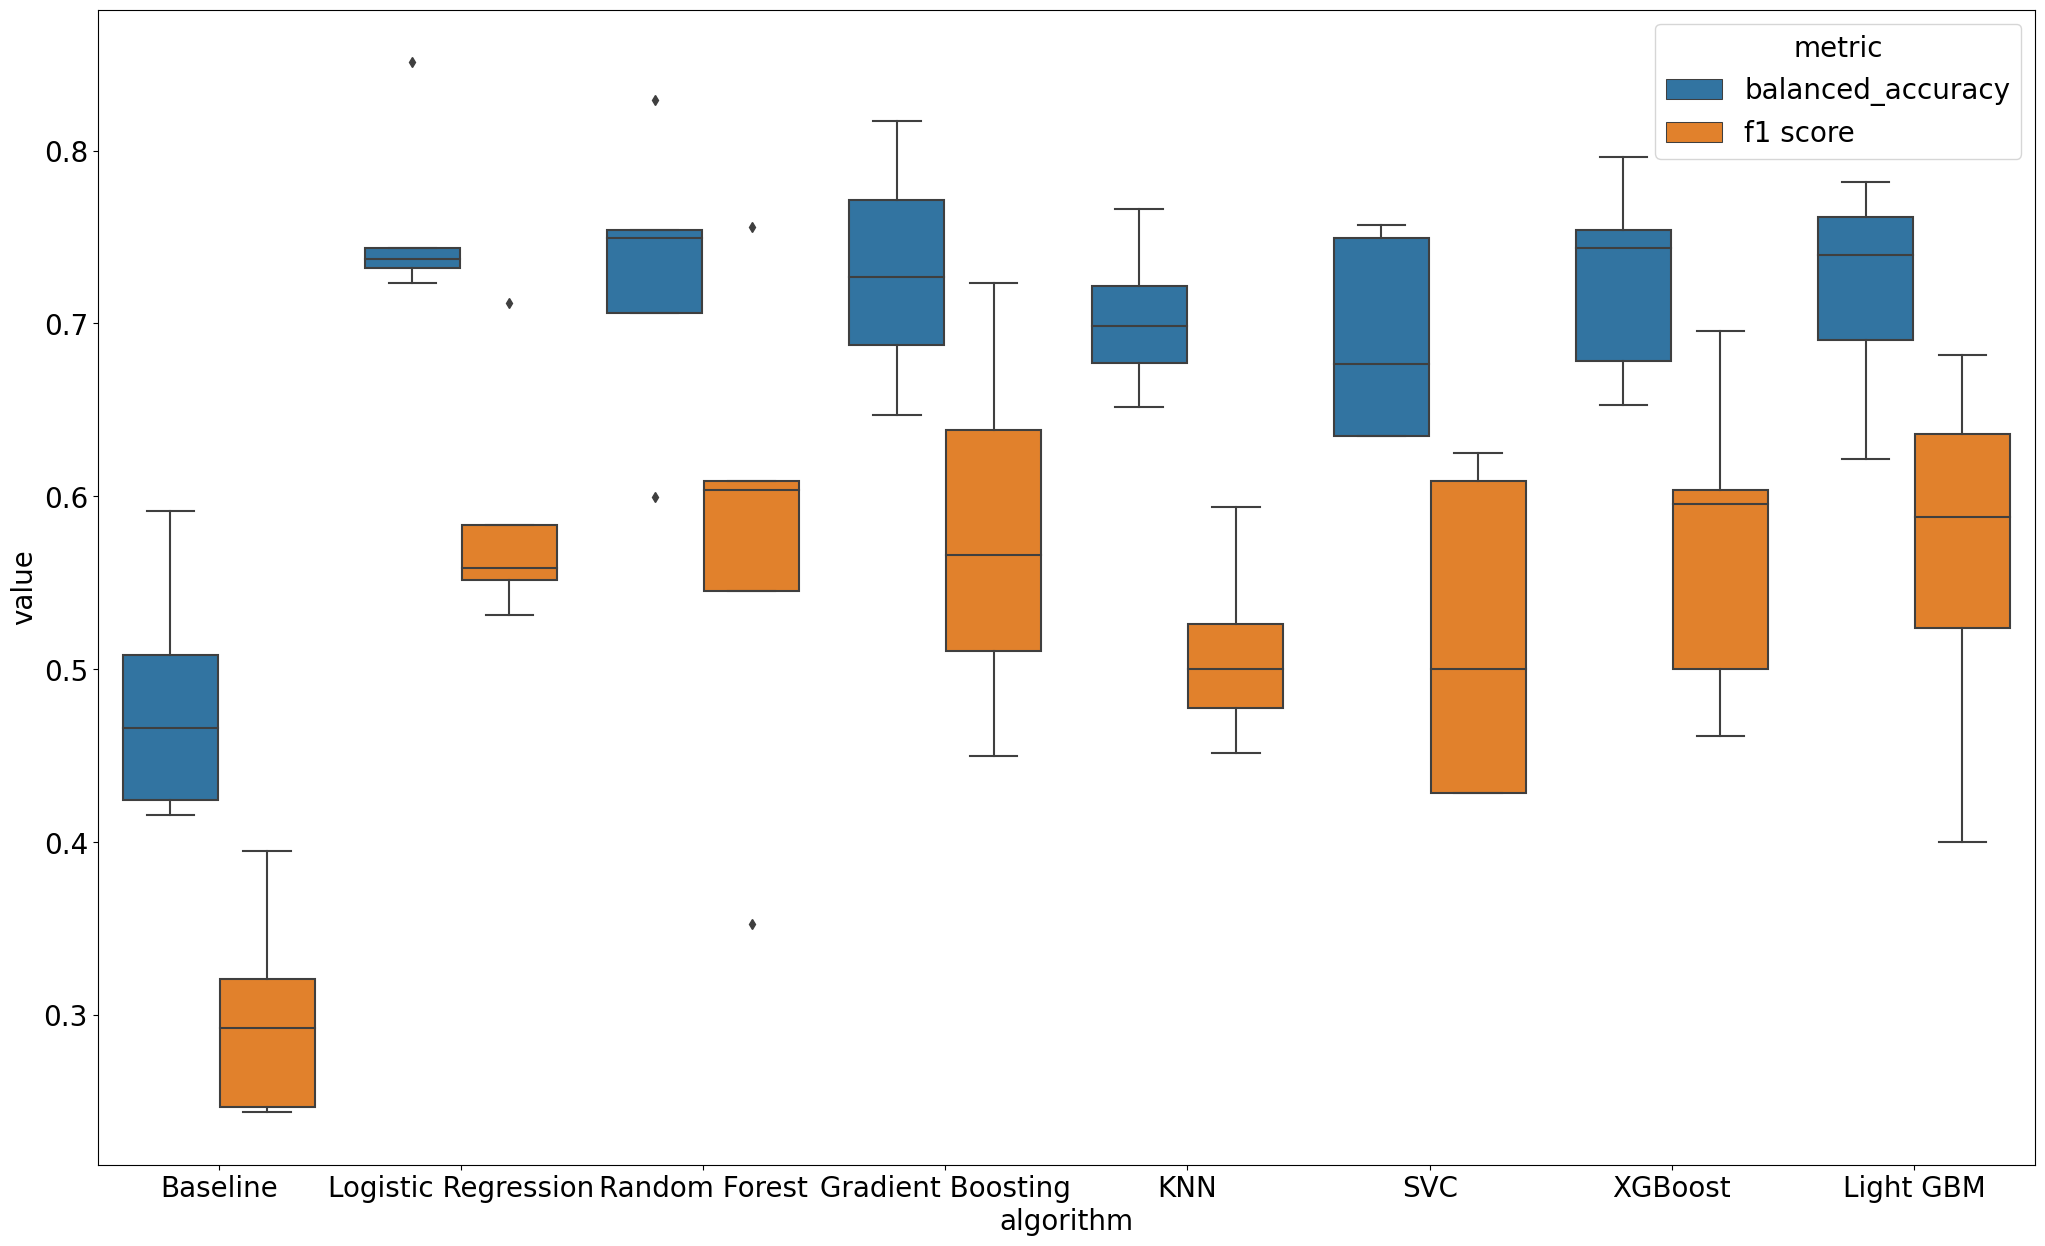

In [89]:
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(x="algorithm", y="value", data=melted, hue="metric", ax=ax, meanline=True)

Text(0, 0.5, '')

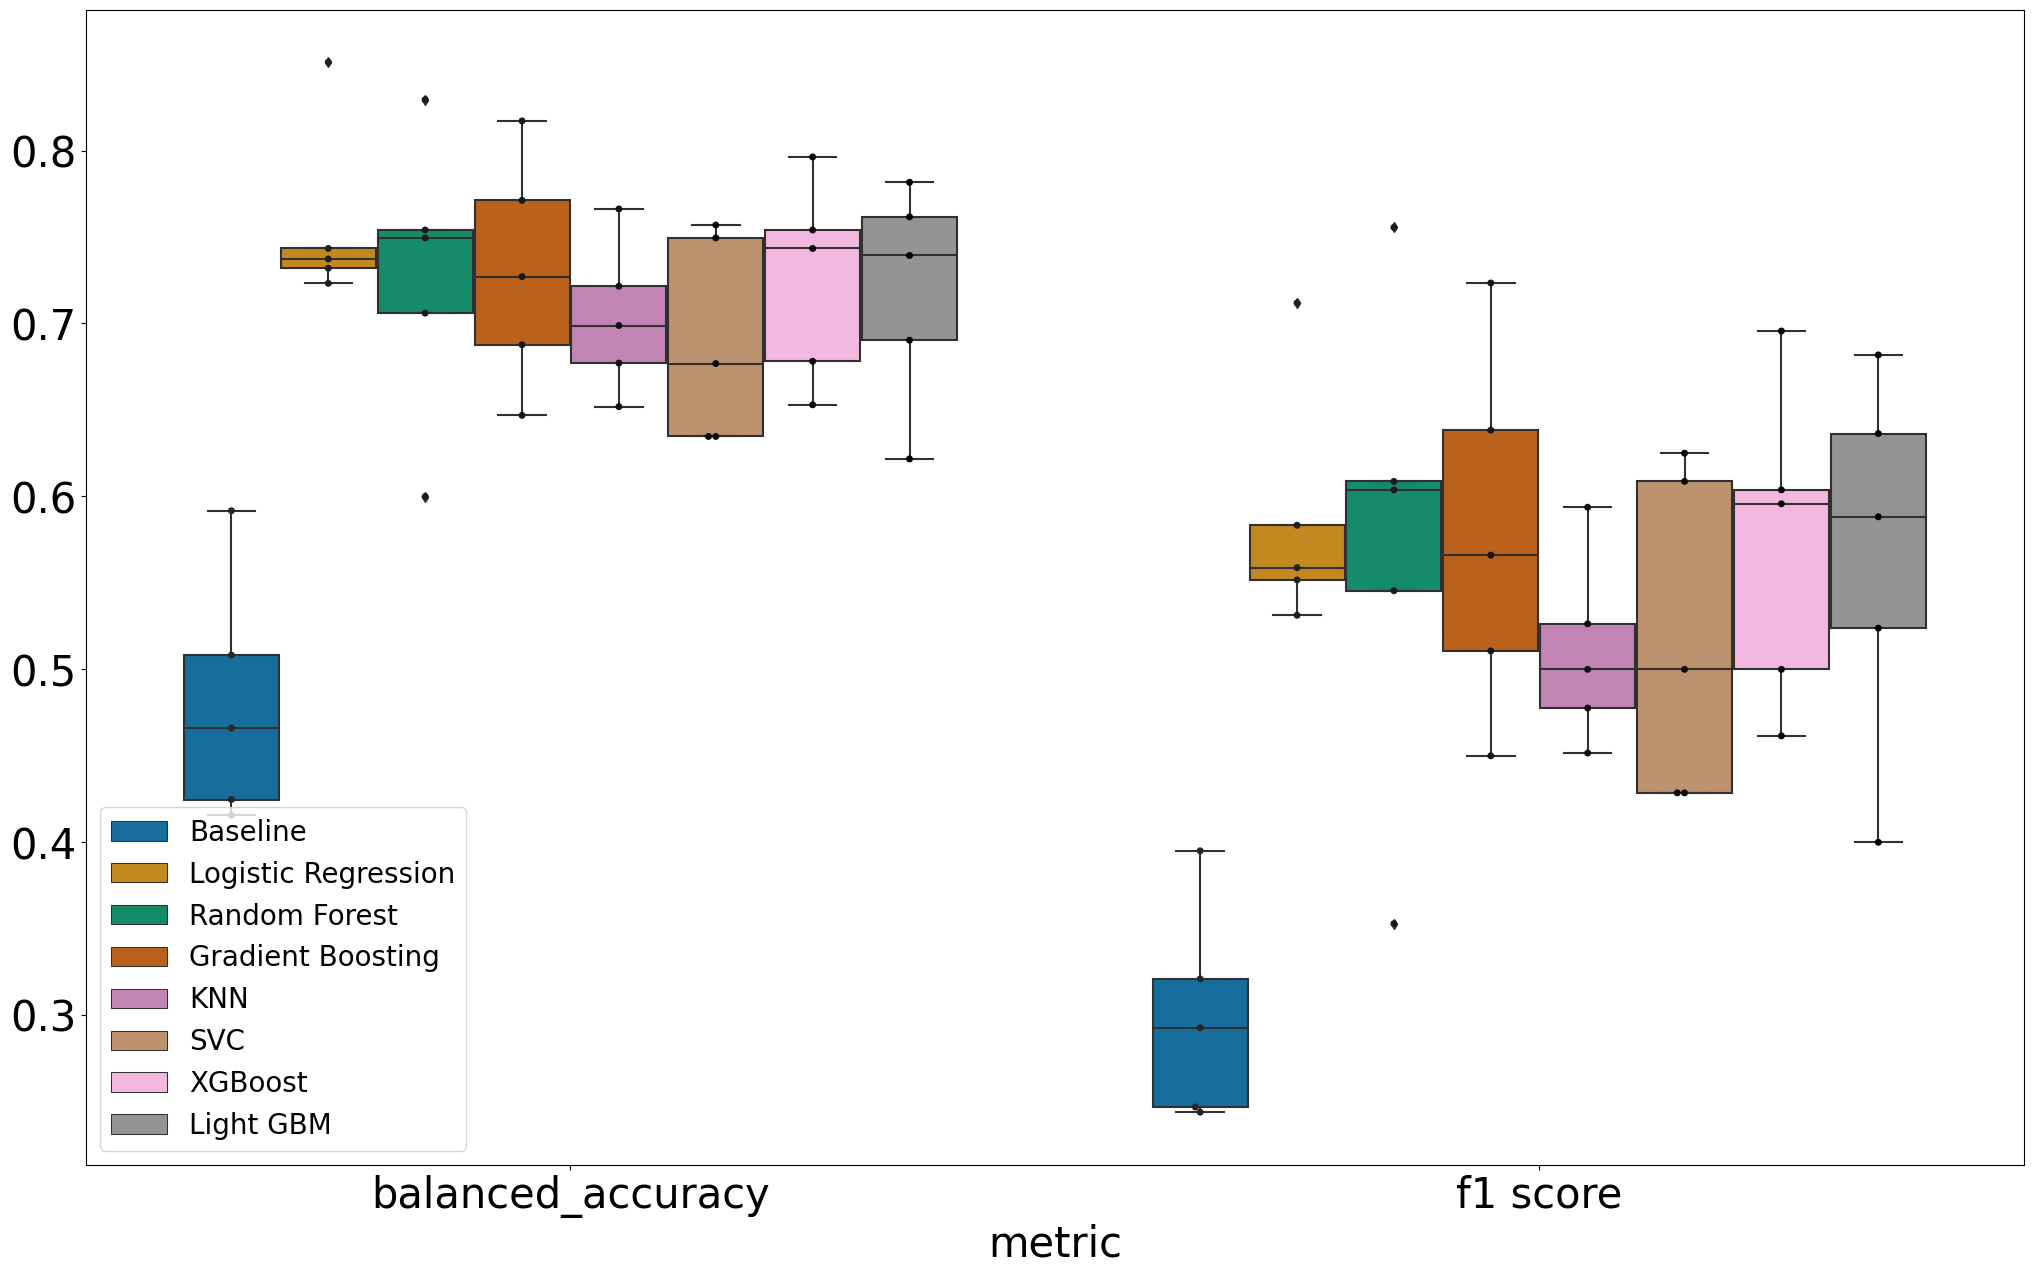

In [90]:
rcParams["font.size"] = 30
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(x="metric", y="value", data=melted, hue="algorithm", ax=ax, palette="colorblind")
sns.swarmplot(x="metric", y="value", data=melted, hue="algorithm", ax=ax, dodge=True, color="k")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:8], labels[:8], fontsize=20)
ax.set_ylabel(None)

In [91]:
fig.savefig("cv_res_fqd_pca.pdf")

# PCA features analysis

In [41]:
xx = x[cols]
yy = y

In [42]:
rcParams["font.size"] = 40

In [43]:
scaler = StandardScaler()
xx = scaler.fit_transform(xx)
oob_x = scaler.transform(oob_x[cols])

In [44]:
xx = pca.fit_transform(xx)
oob_x = pca.transform(oob_x)

In [45]:
loading_scores = pd.Series(pca.components_[0], index=cols)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_4_gap               0.129750
quant_FQD_4_zpve              0.129245
quant_FQD_4_alpha             0.129209
quant_FQD_4_cv                0.129000
quant_FQD_4_g298_per_atom     0.128967
quant_FQD_4_u0_per_atom       0.128967
quant_FQD_4_u298_per_atom     0.128967
quant_FQD_4_h298_per_atom     0.128967
quant_FQD_4_homo              0.128902
quant_FQD_4_cv_per_atom       0.128383
quant_FQD_4_homo_per_atom     0.128065
quant_FQD_4_alpha_per_atom    0.127556
quant_FQD_4_gap_per_atom      0.127343
quant_FQD_4_zpve_per_atom     0.126045
quant_FQD_4_lumo              0.124204
quant_FQD_4_g298              0.123272
quant_FQD_4_u0                0.123271
quant_FQD_4_u298              0.123271
quant_FQD_4_h298              0.123271
quant_FQD_5_zpve              0.121819
quant_FQD_3_cv                0.120632
quant_FQD_3_alpha             0.120503
quant_FQD_4_lumo_per_atom     0.120299
quant_FQD_3_homo              0.120074
quant_FQD_3_gap               0.119990
quant_FQD_5_cv           

In [46]:
loading_scores = pd.Series(pca.components_[1], index=cols)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_8_homo_per_atom     0.150824
quant_FQD_8_gap_per_atom      0.145281
quant_FQD_8_alpha_per_atom    0.145278
quant_FQD_8_cv_per_atom       0.142841
quant_FQD_7_g298              0.135449
quant_FQD_7_u0                0.135446
quant_FQD_7_h298              0.135446
quant_FQD_7_u298              0.135434
quant_FQD_8_homo              0.135360
quant_FQD_7_g298_per_atom     0.134771
quant_FQD_7_u0_per_atom       0.134769
quant_FQD_7_h298_per_atom     0.134769
quant_FQD_7_u298_per_atom     0.134761
quant_FQD_7_homo_per_atom     0.134062
quant_FQD_7_homo              0.131274
quant_FQD_8_gap               0.130308
quant_FQD_8_alpha             0.130057
quant_FQD_7_gap_per_atom      0.130029
quant_FQD_8_g298              0.129476
quant_FQD_8_u0                0.129474
quant_FQD_8_h298              0.129473
quant_FQD_8_u298              0.129462
quant_FQD_9_homo_per_atom     0.127814
quant_FQD_7_alpha_per_atom    0.126645
quant_FQD_9_alpha_per_atom    0.126346
quant_FQD_9_gap_per_atom 

In [47]:
loading_scores = pd.Series(pca.components_[2], index=cols)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_2_gap_per_atom      0.198516
quant_FQD_2_cv_per_atom       0.198030
quant_FQD_2_zpve_per_atom     0.197706
quant_FQD_2_lumo_per_atom     0.196865
quant_FQD_2_alpha_per_atom    0.196634
quant_FQD_2_homo_per_atom     0.195073
quant_FQD_2_g298_per_atom     0.178868
quant_FQD_2_u0_per_atom       0.178863
quant_FQD_2_u298_per_atom     0.178862
quant_FQD_2_h298_per_atom     0.178861
quant_FQD_2_lumo              0.114464
quant_FQD_6_homo_per_atom     0.112750
quant_FQD_3_zpve_per_atom     0.112161
quant_FQD_3_alpha_per_atom    0.110677
quant_FQD_3_gap_per_atom      0.110603
quant_FQD_3_homo_per_atom     0.109210
quant_FQD_3_cv_per_atom       0.109011
quant_FQD_6_alpha_per_atom    0.108815
quant_FQD_6_gap_per_atom      0.107688
quant_FQD_5_mu                0.107156
quant_FQD_3_lumo_per_atom     0.106004
quant_FQD_4_mu                0.102905
quant_FQD_9_cv                0.101929
quant_FQD_5_g298              0.100299
quant_FQD_5_u0                0.100297
quant_FQD_5_h298         

In [48]:
loading_scores = pd.Series(pca.components_[3], index=cols)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_6_gap_per_atom      0.152787
quant_FQD_6_cv_per_atom       0.149413
quant_FQD_2_h298              0.148075
quant_FQD_2_u298              0.148075
quant_FQD_2_u0                0.148074
quant_FQD_2_g298              0.148073
quant_FQD_6_zpve_per_atom     0.145038
quant_FQD_6_homo_per_atom     0.136692
quant_FQD_6_alpha_per_atom    0.133761
quant_FQD_6_lumo_per_atom     0.132863
quant_FQD_7_lumo_per_atom     0.121223
quant_FQD_2_homo              0.119506
quant_FQD_2_mu                0.117034
quant_FQD_2_cv                0.116495
quant_FQD_3_h298              0.111452
quant_FQD_3_u298              0.111452
quant_FQD_3_u0                0.111452
quant_FQD_3_g298              0.111450
quant_FQD_6_gap               0.109623
quant_FQD_3_mu                0.108227
quant_FQD_6_g298_per_atom     0.108089
quant_FQD_6_u0_per_atom       0.108084
quant_FQD_6_h298_per_atom     0.108084
quant_FQD_6_u298_per_atom     0.108043
quant_FQD_5_gap_per_atom      0.108023
quant_FQD_2_gap          

## Check which fragments are most important by atoms count

In [49]:
import itertools
from collections import Counter
keys = [f"PC{i}" for i in range(1,8)]
pc_dict = {k: None for k in keys}
pc_props_whole = []
for i in range(7):
    loading_scores = pd.Series(pca.components_[i], index=cols)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    splitted_names = itertools.chain.from_iterable([x.split("_") for x in sorted_loading_scores.index[:40]])
    PC_props = [x for x in splitted_names if x in [f"{j}" for j in range(1,10)]]
    pc_dict[f"PC{i+1}"] = Counter(PC_props)
    pc_props_whole += PC_props

pc_dict

{'PC1': Counter({'4': 20, '5': 10, '3': 10}),
 'PC2': Counter({'8': 17, '7': 15, '9': 8}),
 'PC3': Counter({'2': 12, '6': 6, '3': 10, '5': 6, '4': 1, '9': 5}),
 'PC4': Counter({'6': 13, '2': 9, '7': 4, '3': 6, '5': 6, '9': 2}),
 'PC5': Counter({'6': 9, '9': 8, '5': 6, '7': 5, '2': 7, '8': 5}),
 'PC6': Counter({'6': 10,
          '3': 3,
          '9': 7,
          '2': 3,
          '8': 3,
          '7': 10,
          '5': 2,
          '4': 2}),
 'PC7': Counter({'7': 2,
          '8': 5,
          '9': 2,
          '5': 10,
          '2': 6,
          '6': 2,
          '3': 9,
          '4': 4})}

In [50]:
Counter(pc_props_whole).most_common(5)

[('5', 40), ('6', 40), ('3', 38), ('2', 37), ('7', 36)]

## Check which fragments are most important by quantum feature

In [108]:
pc_dict2 = {k: None for k in keys}
pc_props_whole2 = []
for i in range(7):
    loading_scores = pd.Series(pca.components_[i], index=cols)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    splitted_names = itertools.chain.from_iterable([x.split("_") for x in sorted_loading_scores.index[:40]])
    PC_props = [x for x in splitted_names if x in qprops]
    pc_dict2[f"PC{i+1}"] = Counter(PC_props).most_common(5)
    pc_props_whole2 += PC_props


pc_dict2

{'PC1': [('zpve', 5), ('alpha', 5), ('cv', 5), ('lumo', 5), ('gap', 4)],
 'PC2': [('homo', 5), ('gap', 5), ('alpha', 5), ('g298', 5), ('u0', 5)],
 'PC3': [('zpve', 5), ('homo', 5), ('gap', 4), ('cv', 4), ('alpha', 4)],
 'PC4': [('gap', 5), ('lumo', 5), ('zpve', 4), ('homo', 4), ('alpha', 4)],
 'PC5': [('g298', 6), ('h298', 5), ('u0', 5), ('u298', 5), ('homo', 4)],
 'PC6': [('mu', 10), ('zpve', 6), ('h298', 5), ('u298', 4), ('u0', 4)],
 'PC7': [('mu', 16), ('lumo', 4), ('u298', 4), ('h298', 3), ('u0', 3)]}

In [109]:
Counter(pc_props_whole2).most_common(10)

[('mu', 33),
 ('zpve', 27),
 ('g298', 27),
 ('u298', 27),
 ('h298', 27),
 ('u0', 26),
 ('gap', 24),
 ('cv', 24),
 ('alpha', 23),
 ('homo', 23)]

In [53]:
xx.shape

(526, 18)

In [54]:
pca_df = pd.DataFrame(xx, columns=[f"PC{n}" for n in range(1, xx.shape[1]+1)])

In [55]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,4.284421,-1.872287,-4.796424,-0.626301,-1.359081,0.597452,-0.352307,0.429814,0.351305,-0.376277,-0.595309,-1.019267,-0.601788,0.429571,0.506501,-0.469198,0.618595,0.620515
1,-5.934656,4.200080,3.749729,-1.543506,-1.480642,-1.369324,6.436511,-0.565176,0.331875,-2.412641,1.059431,1.070739,-1.863934,1.144334,3.453451,-0.362942,2.399716,1.483245
2,4.931752,-1.607893,-2.490060,-1.036759,0.158460,-1.215622,-0.946162,0.653389,-0.087209,-0.263871,-0.519242,0.753271,-1.252579,1.017350,0.389626,-1.513313,-0.244670,-0.901949
3,5.241121,0.131047,-4.819501,-1.832958,-1.139428,2.351874,3.987138,-0.696143,-1.396787,-0.278453,1.484445,0.393015,1.381625,-1.675737,-0.777835,0.606899,-0.636689,0.559179
4,-2.459377,6.422610,4.054392,-4.615230,2.854621,1.751078,-0.100034,-1.549084,1.812420,1.629034,-2.920104,-2.169199,0.218244,0.588438,-0.092901,-0.384228,0.053616,0.100555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,-0.785645,8.021462,7.295669,-4.493426,2.861271,0.856178,0.548230,-2.691541,1.847405,2.407315,-2.562164,-0.461806,0.215905,-0.048461,-0.947505,-1.607721,0.228696,1.036117
522,-6.484270,-0.847586,-0.595806,-0.721909,-3.273953,-3.538038,0.333427,1.399467,1.056271,-0.604382,1.912079,0.575568,0.807749,0.532406,-0.646239,0.655993,0.991255,-1.474448
523,5.236440,-0.123007,-3.886146,-0.969934,-0.305438,1.989422,3.365753,-0.745064,-1.512514,-0.776636,0.367656,-1.028963,0.835922,-0.358225,-1.902275,-0.122700,-0.099579,-0.302770
524,4.093970,-2.279732,-3.343239,-1.677733,-0.028353,-0.468242,-1.116615,0.920831,-0.295945,-0.483407,-0.310595,1.367286,-1.417990,0.464533,0.545493,-1.524802,-0.837315,-1.033522


### Visualize PCA

In [56]:
rcParams["font.size"] = 25

In [57]:
for i, v in enumerate((pca.explained_variance_ratio_*100).cumsum()):
    print(i, f"{v:.3}")

0 25.9
1 43.3
2 54.1
3 62.9
4 68.6
5 73.5
6 77.4
7 80.8
8 83.4
9 86.0
10 88.3
11 90.2
12 91.5
13 92.6
14 93.5
15 94.2
16 94.8
17 95.5


Text(0, 0.5, 'summary % variance explained')

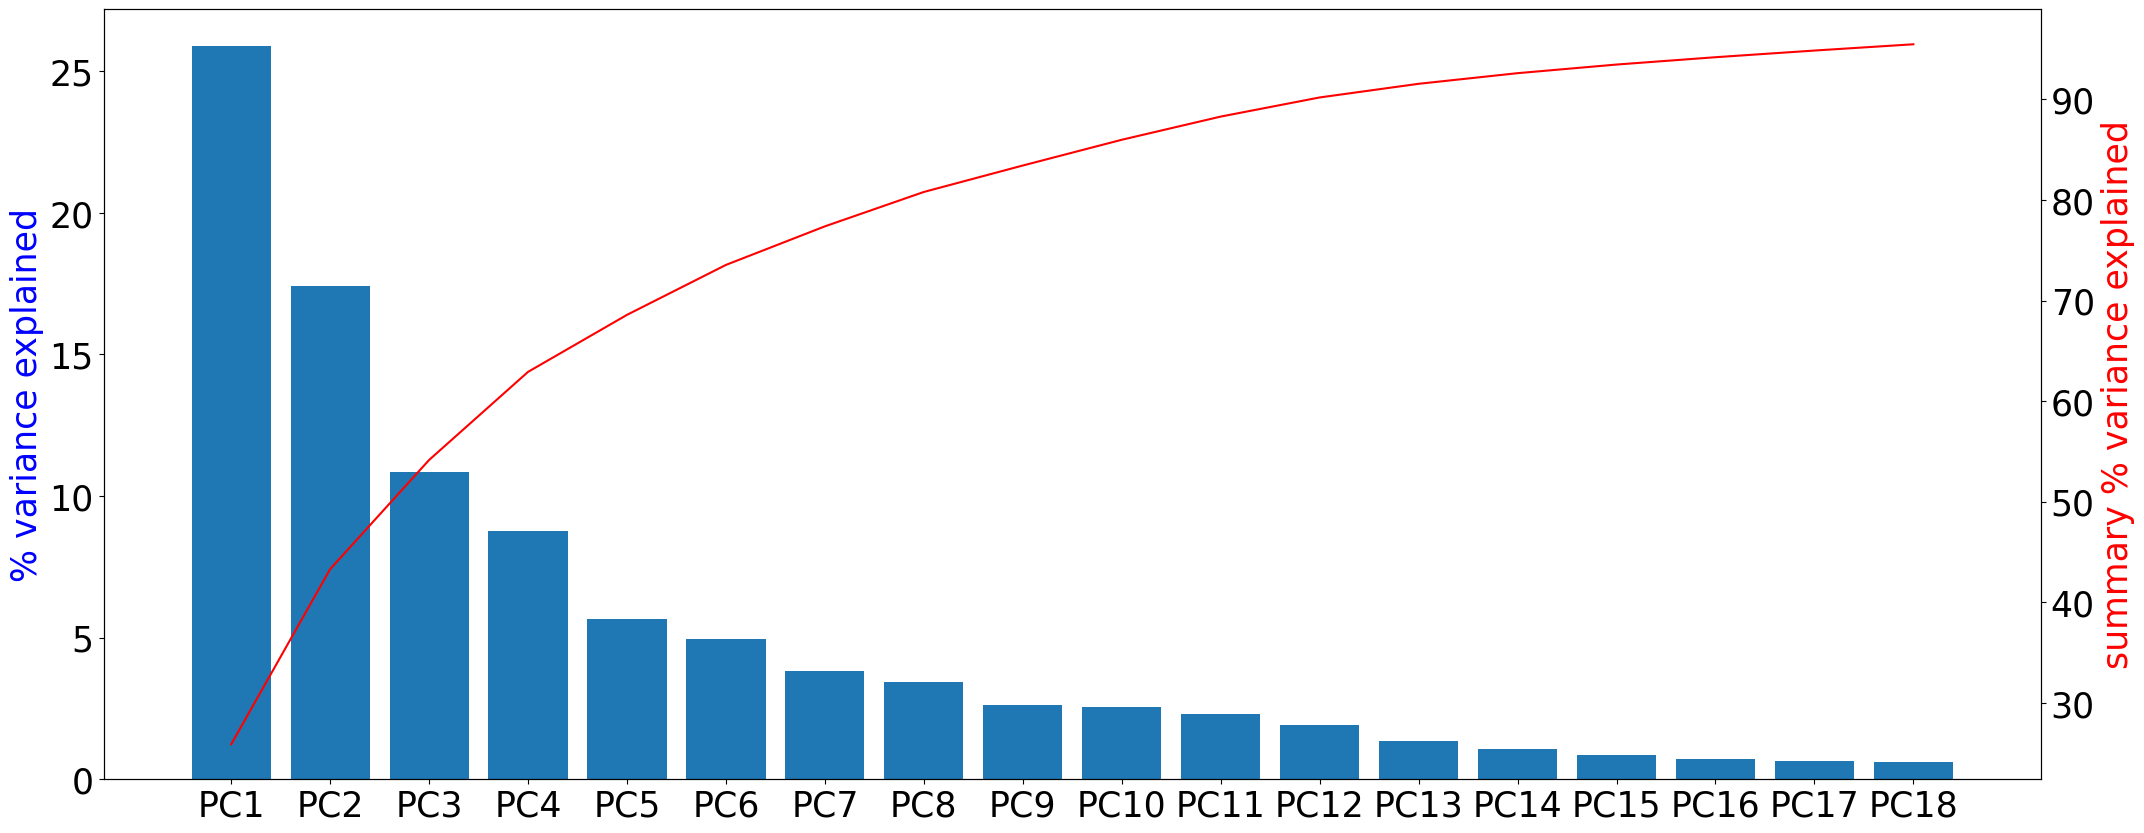

In [58]:
pcs = [f"PC{n}" for n in range(1, xx.shape[1]+1)]
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(pcs, pca.explained_variance_ratio_*100)
ax2 = ax.twinx()
ax2.plot(pcs, (pca.explained_variance_ratio_*100).cumsum(), c="r")
ax.set_ylabel("% variance explained", color="b")
ax2.set_ylabel("summary % variance explained", color="r")

In [59]:
fig.savefig("scree_plot_fqd_pca.pdf")

### 2D

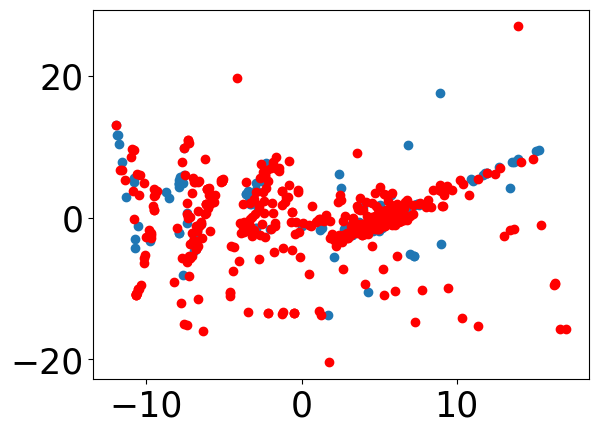

In [60]:
fig, ax = plt.subplots()
pca_df_ones = pca_df[(yy==1).values]
pca_df_zeros = pca_df[(yy==0).values]
ax.scatter(pca_df_ones["PC1"], pca_df_ones["PC2"])
ax.scatter(pca_df_zeros["PC1"], pca_df_zeros["PC2"], c="r")

### 3D

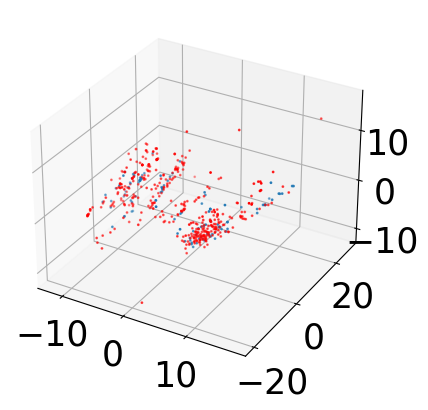

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter(pca_df_ones["PC1"], pca_df_ones["PC2"], pca_df_ones["PC3"], s=1)
ax.scatter(pca_df_zeros["PC1"], pca_df_zeros["PC2"], pca_df_zeros["PC3"], c="r", s=1)

In [62]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,4.284421,-1.872287,-4.796424,-0.626301,-1.359081,0.597452,-0.352307,0.429814,0.351305,-0.376277,-0.595309,-1.019267,-0.601788,0.429571,0.506501,-0.469198,0.618595,0.620515
1,-5.934656,4.200080,3.749729,-1.543506,-1.480642,-1.369324,6.436511,-0.565176,0.331875,-2.412641,1.059431,1.070739,-1.863934,1.144334,3.453451,-0.362942,2.399716,1.483245
2,4.931752,-1.607893,-2.490060,-1.036759,0.158460,-1.215622,-0.946162,0.653389,-0.087209,-0.263871,-0.519242,0.753271,-1.252579,1.017350,0.389626,-1.513313,-0.244670,-0.901949
3,5.241121,0.131047,-4.819501,-1.832958,-1.139428,2.351874,3.987138,-0.696143,-1.396787,-0.278453,1.484445,0.393015,1.381625,-1.675737,-0.777835,0.606899,-0.636689,0.559179
4,-2.459377,6.422610,4.054392,-4.615230,2.854621,1.751078,-0.100034,-1.549084,1.812420,1.629034,-2.920104,-2.169199,0.218244,0.588438,-0.092901,-0.384228,0.053616,0.100555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,-0.785645,8.021462,7.295669,-4.493426,2.861271,0.856178,0.548230,-2.691541,1.847405,2.407315,-2.562164,-0.461806,0.215905,-0.048461,-0.947505,-1.607721,0.228696,1.036117
522,-6.484270,-0.847586,-0.595806,-0.721909,-3.273953,-3.538038,0.333427,1.399467,1.056271,-0.604382,1.912079,0.575568,0.807749,0.532406,-0.646239,0.655993,0.991255,-1.474448
523,5.236440,-0.123007,-3.886146,-0.969934,-0.305438,1.989422,3.365753,-0.745064,-1.512514,-0.776636,0.367656,-1.028963,0.835922,-0.358225,-1.902275,-0.122700,-0.099579,-0.302770
524,4.093970,-2.279732,-3.343239,-1.677733,-0.028353,-0.468242,-1.116615,0.920831,-0.295945,-0.483407,-0.310595,1.367286,-1.417990,0.464533,0.545493,-1.524802,-0.837315,-1.033522


In [63]:
yy

586    1
579    0
305    0
383    0
434    0
      ..
454    0
115    1
534    0
817    0
368    0
Name: class_encoded, Length: 526, dtype: int64

In [83]:
pd.concat([pca_df, yy.reset_index(drop=True)], axis=1).to_csv("pca_df.csv")

# Mutual information

## No PCA

In [65]:
from sklearn.feature_selection import mutual_info_classif

In [66]:
minf = mutual_info_classif(dat3[cols], dat3_y, random_state=1, n_neighbors=3)

In [67]:
minf = pd.Series(minf, index=cols)

In [68]:
minf.sort_values(ascending=False).head(40)

quant_FQD_7_mu_per_atom       0.146264
quant_FQD_8_g298              0.128036
quant_FQD_8_u298              0.124797
quant_FQD_2_homo_per_atom     0.124427
quant_FQD_8_h298              0.124315
quant_FQD_8_u0                0.122509
quant_FQD_8_zpve              0.121353
quant_FQD_9_zpve              0.121104
quant_FQD_2_g298_per_atom     0.116160
quant_FQD_9_u298              0.114176
quant_FQD_9_u0                0.114136
quant_FQD_9_h298              0.111369
quant_FQD_9_g298              0.110898
quant_FQD_2_h298_per_atom     0.110079
quant_FQD_9_mu_per_atom       0.109268
quant_FQD_9_alpha             0.109015
quant_FQD_7_lumo_per_atom     0.108897
quant_FQD_2_alpha_per_atom    0.106519
quant_FQD_2_u298_per_atom     0.105628
quant_FQD_8_alpha             0.104974
quant_FQD_8_gap               0.104119
quant_FQD_8_lumo              0.103860
quant_FQD_7_alpha_per_atom    0.103012
quant_FQD_7_u0                0.102692
quant_FQD_7_u298_per_atom     0.099185
quant_FQD_7_homo_per_atom

In [69]:
splitted_names = [x.split("_") for x in minf.sort_values(ascending=False).index[:40]]
minf_len = [x[2] for x in splitted_names]
len_counter = Counter(minf_len)
minf_prop = [x[3] for x in splitted_names]
prop_counter = Counter(minf_prop)

In [70]:
len_counter

Counter({'7': 12, '8': 10, '2': 10, '9': 8})

In [71]:
prop_counter

Counter({'mu': 3,
         'g298': 4,
         'u298': 4,
         'homo': 3,
         'h298': 4,
         'u0': 5,
         'zpve': 4,
         'alpha': 4,
         'lumo': 4,
         'gap': 3,
         'cv': 2})

## PCA

In [78]:
minf = mutual_info_classif(pca_df, y, random_state=1, n_neighbors=3)

In [79]:
minf = pd.Series(minf, index=pca_df.columns)

In [80]:
minf.sort_values(ascending=False).head(40)

PC7     0.114592
PC14    0.100533
PC8     0.094578
PC1     0.091715
PC10    0.058274
PC3     0.056031
PC12    0.056023
PC2     0.039162
PC11    0.038526
PC13    0.034756
PC17    0.026143
PC6     0.025232
PC15    0.023253
PC4     0.022361
PC18    0.013703
PC9     0.012765
PC16    0.008810
PC5     0.001206
dtype: float64